Let’s see if we can take advantage of these peculiar statistics caused by deamination to locate ori in a circular bacterial genome. Since we know that **C is more frequent in half of the genome and less frequent in the other half**, our idea is to slide a giant window of length `len(Genome)//2` down the genome, counting the number of occurrences of C in each window. (Note: in Python, the double slash `//` indicates **integer division**, or eliminating any remainder; therefore, 11//2 is equal to 5, not 5.5.) Inspired by the nucleotide counts table in Vibrio cholerae (reproduced below), our hope is that the window having **the fewest occurrences of C** will roughly correspond to **the forward half-strand** and that the window having **the most occurrences of C** will roughly correspond to the **reverse half-strand**. And if we know where the forward and reverse half-strands are, then we have found ori!

![Rf](RF.png)

## Analyzing a genome’s half-strands

Although most bacteria have circular genomes, we have thus far assumed that genomes were linear, a reasonable simplifying assumption because the length of the window is much shorter than the length of the genome. This time, because we are sliding a giant window, we should account for windows that “wrap around” the end of Genome. To do so, we will define a string ExtendedGenome as `Genome+Genome[0:n//2]`. That is, we copy the first len(Genome)//2 nucleotides of Genome to the end of the string (figure below).

```
                            CTGCTTCGCCCGCCGGACCGGCCTCGTGATGGGGTCTGCTTCGCCCGCCGGA
```

**Figure**: A DNA string Genome (shown in black) containing 35 nucleotides that is extended by its first 17 nucleotides (shown in green) to yield ExtendedGenome.

We will keep track of the total number of occurrences of C that we encounter in each window of ExtendedGenome by using a symbol array. The i-th element of the symbol array is equal to the number of occurrences of the symbol in the window of length len(Genome)//2 starting at position i of ExtendedGenome. For example, see the figure below.

![dd](dd.png)

**Figure**: The symbol array for Genome equal to "AAAAGGGG" and symbol equal to "A".

Fortunately, we already know how to count the number of occurrences of C in a window of ExtendedGenome: use the function PatternCount! We can therefore define the following function that takes strings Genome and symbol as input and returns the symbol array of Genome corresponding to symbol.



In [7]:
def PatternCount(Pattern, Text):
    import re
    return len(re.findall('(?='+Pattern+')', Text))

def SymbolArray_lowlow(Genome, symbol):
    array = {}
    ExtendedGenome = Genome + Genome[0:len(Genome)//2]
    return {i:PatternCount(symbol, ExtendedGenome[i:i+(len(Genome)//2)]) for i in range(len(Genome))}
    
def SymbolArray_low(Genome, symbol):
    array = {}
    ExtendedGenome = Genome + Genome[0:len(Genome)//2]
    for i in range(len(Genome)):
        array[i] = PatternCount(symbol, ExtendedGenome[i:i+(len(Genome)//2)])
    return array

In [8]:
print(SymbolArray("AAAAGGGG", "A"))

NameError: name 'SymbolArray' is not defined

In [9]:
with open("E_coli.txt", "r") as E_coli:
    E_coli = E_coli.read()

## From an inefficient to an efficient algorithm

Just because SymbolArray is inefficient does not imply that a quick algorithm for constructing a symbol array does not exist. To develop a faster algorithm, we will think about what currently happens in the for loop within SymbolArray, reproduced below.



In [42]:
def FasterSymbolArray(Genome, symbol):
    array = {}
    n = len(Genome)
    ExtendedGenome = Genome + Genome[0:(n//2)]
    array[0] = PatternCount(Pattern=symbol, Text=ExtendedGenome[0:(n//2)])
    for i in range(1,n):
        array[i] = array[i-1]
        if ExtendedGenome[i-1] == symbol:
            array[i] -= 1
        if ExtendedGenome[i+ (n//2) -1] == symbol:
            array[i] += 1
    return array

In [43]:
array = FasterSymbolArray(E_coli, "C")

In [44]:
import matplotlib.pyplot as plt
import numpy as np

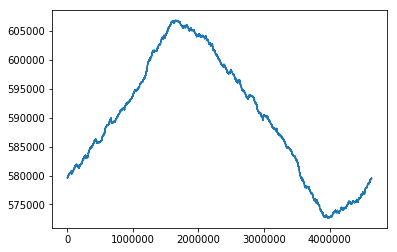

In [47]:
Count = []
for i in array:
    Count.append(array[i])
position = np.linspace(0, len(array), len(array))
plt.plot(position, Count)

In [63]:
# Input:  A String Genome
# Output: The skew array of Genome as a list.
def SkewArray(Genome):
    skew = {}
    skew[0] = 0
    for i in range(1,len(Genome)):
        if Genome[i-1] == "C":
            skew[i] = skew[i-1] - 1
        if Genome[i-1] == "G":
            skew[i] = skew[i-1] + 1
        if Genome[i-1] == "A" or Genome[i-1] == "T":
            skew[i] = skew[i-1]
    return skew.values

In [ ]:
G_C_E = SkewArray(E_coli)

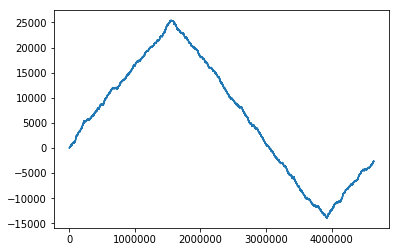

In [60]:
G_C = []
for i in G_C_E:
    G_C.append(G_C_E[i])
position = np.linspace(0, len(G_C_E), len(G_C_E))
plt.plot(position, G_C)

In [61]:
print(max(G_C))
print(min(G_C))

25439
-13919


In [62]:
print(SkewArray("AGCGTGCCGAAATATGCCGCCAGACCTGCTGCGGTGGCCTCGCCGACTTCACGGATGCCAAGTGCATAGAGGAAGCGAGCAAAGGTGGTTTCTTTCGCTTTATCCAGCGCGTTAACCACGTTCTGTGCCGACTTT"))

{0: 0, 1: 0, 2: 1, 3: 0, 4: 1, 5: 1, 6: 2, 7: 1, 8: 0, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 2, 17: 1, 18: 0, 19: 1, 20: 0, 21: -1, 22: -1, 23: 0, 24: 0, 25: -1, 26: -2, 27: -2, 28: -1, 29: -2, 30: -2, 31: -1, 32: -2, 33: -1, 34: 0, 35: 0, 36: 1, 37: 2, 38: 1, 39: 0, 40: 0, 41: -1, 42: 0, 43: -1, 44: -2, 45: -1, 46: -1, 47: -2, 48: -2, 49: -2, 50: -3, 51: -3, 52: -4, 53: -3, 54: -2, 55: -2, 56: -2, 57: -1, 58: -2, 59: -3, 60: -3, 61: -3, 62: -2, 63: -2, 64: -1, 65: -2, 66: -2, 67: -2, 68: -2, 69: -1, 70: -1, 71: 0, 72: 1, 73: 1, 74: 1, 75: 2, 76: 1, 77: 2, 78: 2, 79: 3, 80: 2, 81: 2, 82: 2, 83: 2, 84: 3, 85: 4, 86: 4, 87: 5, 88: 6, 89: 6, 90: 6, 91: 6, 92: 5, 93: 5, 94: 5, 95: 5, 96: 4, 97: 5, 98: 4, 99: 4, 100: 4, 101: 4, 102: 4, 103: 4, 104: 3, 105: 2, 106: 2, 107: 3, 108: 2, 109: 3, 110: 2, 111: 3, 112: 3, 113: 3, 114: 3, 115: 3, 116: 2, 117: 1, 118: 1, 119: 0, 120: 1, 121: 1, 122: 1, 123: 0, 124: 0, 125: 1, 126: 1, 127: 2, 128: 1, 129: 0, 130: 1, 131: 1, 132: 0, 133: 